In [1]:
import numpy as np
import pandas as pd
import sklearn
import random

In [2]:
data = pd.read_csv("dhtreadings.csv")

In [3]:
data = data.iloc[:, 1:3]

In [4]:
data

,temperature,humidity
0,22.40,48
1,24.72,78
2,24.72,78
3,24.72,78
4,24.72,78
...,...,...
868,35.94,84
869,36.45,86
870,36.45,86
871,36.73,87


In [5]:
data = data.sort_values('temperature')

In [6]:
arr = []
for i in range(len(data)):
    if i <= len(data) // 3:
        arr.append(1)
    elif len(data) // 3 < i <= 2*len(data) // 3:
        arr.append(2)
    elif i > 2*len(data) // 3:
        arr.append(3)
arr_np = np.array(arr)
arr_np = arr_np.reshape((len(data), 1))

In [7]:
data_np = data.to_numpy()

In [8]:
data_new = np.append(data_np, arr_np, axis = 1)

In [9]:
from sklearn.utils import shuffle
data_new = shuffle(data_new)

In [10]:
data_new

array([[25.22, 77.  ,  3.  ],
       [25.14, 80.  ,  2.  ],
       [24.53, 81.  ,  1.  ],
       ...,
       [25.09, 79.  ,  2.  ],
       [25.09, 79.  ,  2.  ],
       [36.72, 81.  ,  3.  ]])

In [11]:
random_ind = np.random.choice([0, 1], size = data_new.shape[0], p = [0.2, 0.8]).astype('bool')
train_data = data_new[random_ind]
test_data = data_new[(1-random_ind).astype('bool')]
x_train = train_data[:, :2]
y_train = train_data[:, 2]
x_test = test_data[:, :2]
y_test = test_data[:, 2]

In [12]:
from sklearn.tree import DecisionTreeClassifier
classifier_decision = DecisionTreeClassifier()
classifier_decision.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [13]:
y_pred = classifier_decision.predict(x_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[64  0  0]
 [ 0 68  2]
 [ 0  0 56]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        64
         2.0       1.00      0.97      0.99        70
         3.0       0.97      1.00      0.98        56

    accuracy                           0.99       190
   macro avg       0.99      0.99      0.99       190
weighted avg       0.99      0.99      0.99       190



In [15]:
from sklearn.ensemble import RandomForestClassifier
classifier_random = RandomForestClassifier()
classifier_random.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
y_pred = classifier_random.predict(x_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[64  0  0]
 [ 0 68  2]
 [ 0  0 56]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        64
         2.0       1.00      0.97      0.99        70
         3.0       0.97      1.00      0.98        56

    accuracy                           0.99       190
   macro avg       0.99      0.99      0.99       190
weighted avg       0.99      0.99      0.99       190



In [18]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier()
classifier_knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [19]:
y_pred = classifier_knn.predict(x_test)

In [20]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[64  0  0]
 [ 0 68  2]
 [ 0  4 52]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        64
         2.0       0.94      0.97      0.96        70
         3.0       0.96      0.93      0.95        56

    accuracy                           0.97       190
   macro avg       0.97      0.97      0.97       190
weighted avg       0.97      0.97      0.97       190



In [24]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e5)

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(x_train, y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_pred = logreg.predict(x_test)

In [26]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[64  0  0]
 [ 0 68  2]
 [ 0  0 56]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        64
         2.0       1.00      0.97      0.99        70
         3.0       0.97      1.00      0.98        56

    accuracy                           0.99       190
   macro avg       0.99      0.99      0.99       190
weighted avg       0.99      0.99      0.99       190



In [28]:
my_sample = np.array([24, 80]).reshape(1, -1)

In [29]:
y_pred_1 = logreg.predict(my_sample)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        64
         2.0       1.00      0.97      0.99        70
         3.0       0.97      1.00      0.98        56

    accuracy                           0.99       190
   macro avg       0.99      0.99      0.99       190
weighted avg       0.99      0.99      0.99       190



In [28]:
import matplotlib.pyplot as plt

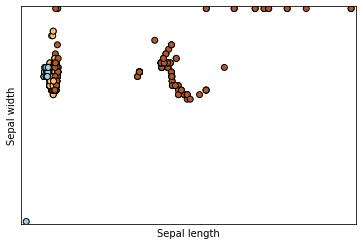

In [31]:

# Plot also the training points
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[64  0  0]
 [ 0 68  2]
 [ 0  0 56]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.97 0.03]
 [0.   0.   1.  ]]


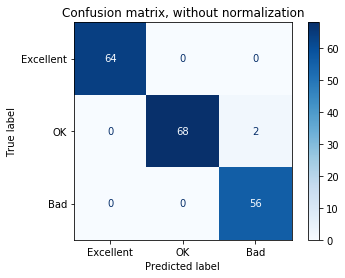

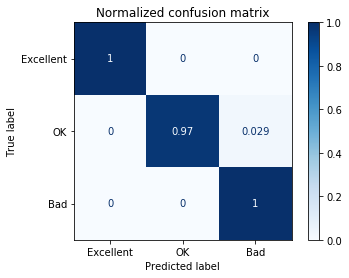

In [34]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(logreg, x_test, y_test,
                                 display_labels=["Excellent", "OK", "Bad"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()